In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


In [18]:
data=pd.read_csv("HR-Employee-Attrition.csv")

In [19]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [20]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [21]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [22]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [44]:
data.drop('EmployeeCount',axis=1,inplace=True)
data.drop('StandardHours',axis=1,inplace=True)
data.drop('EmployeeNumber',axis=1,inplace=True)
data.drop('Over18',axis=1,inplace=True)

# Data Vizualization

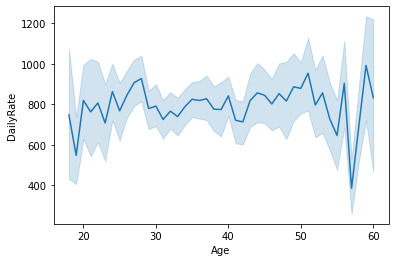

In [45]:
sns.lineplot(x=data["Age"],y=data["DailyRate"],data=data)
plt.show()
#In below graph we can see variation in DailyRate with Age

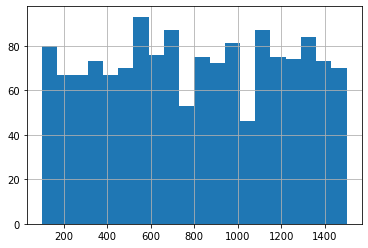

In [46]:
#Let’s analyze Age first. Since the extreme values are practically possible, i.e. some people might 
#leave because of Age. So instead of treating them as outliers, let’s try a log transformation to 
#nullify their effect:
data['DailyRate'].hist(bins=20)


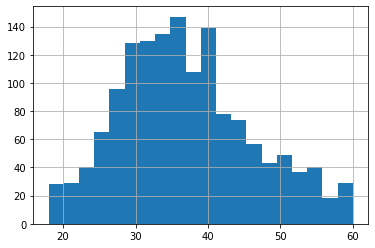

In [47]:
data['Age'].hist(bins=20)

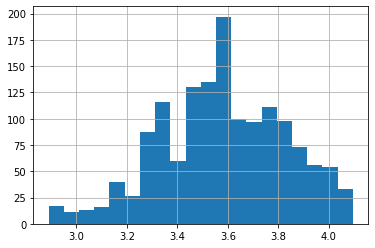

In [48]:
data['Age_log'] = np.log(data['Age'])
data['Age_log'].hist(bins=20)

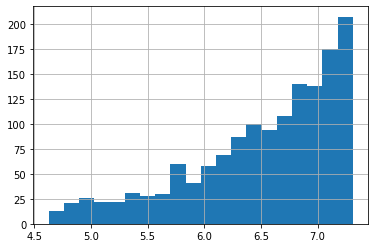

In [49]:
data['DailyRate_log'] = np.log(data['DailyRate'])
data['DailyRate_log'].hist(bins=20)

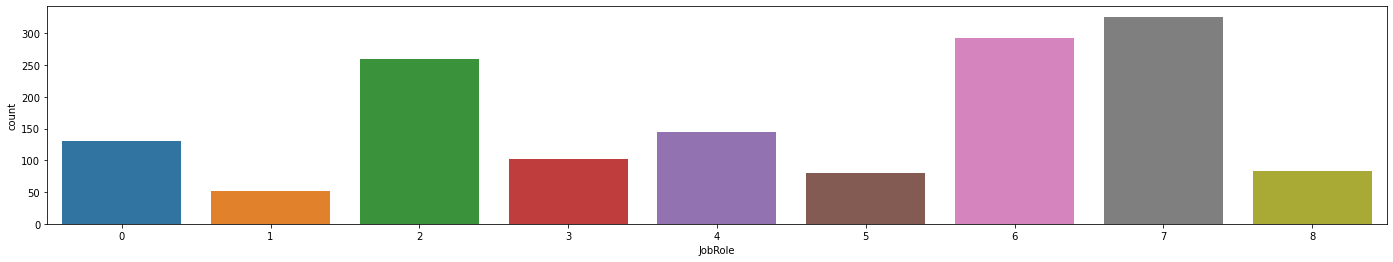

In [56]:
#Lets chcek the attrition in each job role
plt.figure(figsize=(24,4))
sns.countplot(x="JobRole",data=data)
plt.show()

In [52]:
#Building a Predictive Model in Python
#Since, sklearn requires all inputs to be numeric, all the categorical variables to be converted 
#into numeric by encoding the categories. 

from sklearn.preprocessing import LabelEncoder

var_mod = ['Attrition', 'BusinessTravel', 'Department', 'Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

 
le = LabelEncoder()

for i in var_mod:
    data[i] = le.fit_transform(data[i])
data.dtypes 


Age                           int64
Attrition                     int64
BusinessTravel                int64
DailyRate                     int64
Department                    int64
DistanceFromHome              int64
Education                     int64
EducationField                int64
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                       int64
JobSatisfaction               int64
MaritalStatus                 int64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              

# EDA

In [57]:
data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_log,DailyRate_log
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,0.988226,0.000804
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,-0.180844,-0.049561
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636,0.019476,-0.008978
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,0.011325,0.951352
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282,-0.031264,0.012303
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,-0.000385,-0.014951
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,0.229078,-0.017494
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130,-0.049288,0.034744
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,0.009171,0.018950
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599,-0.034304,0.000997


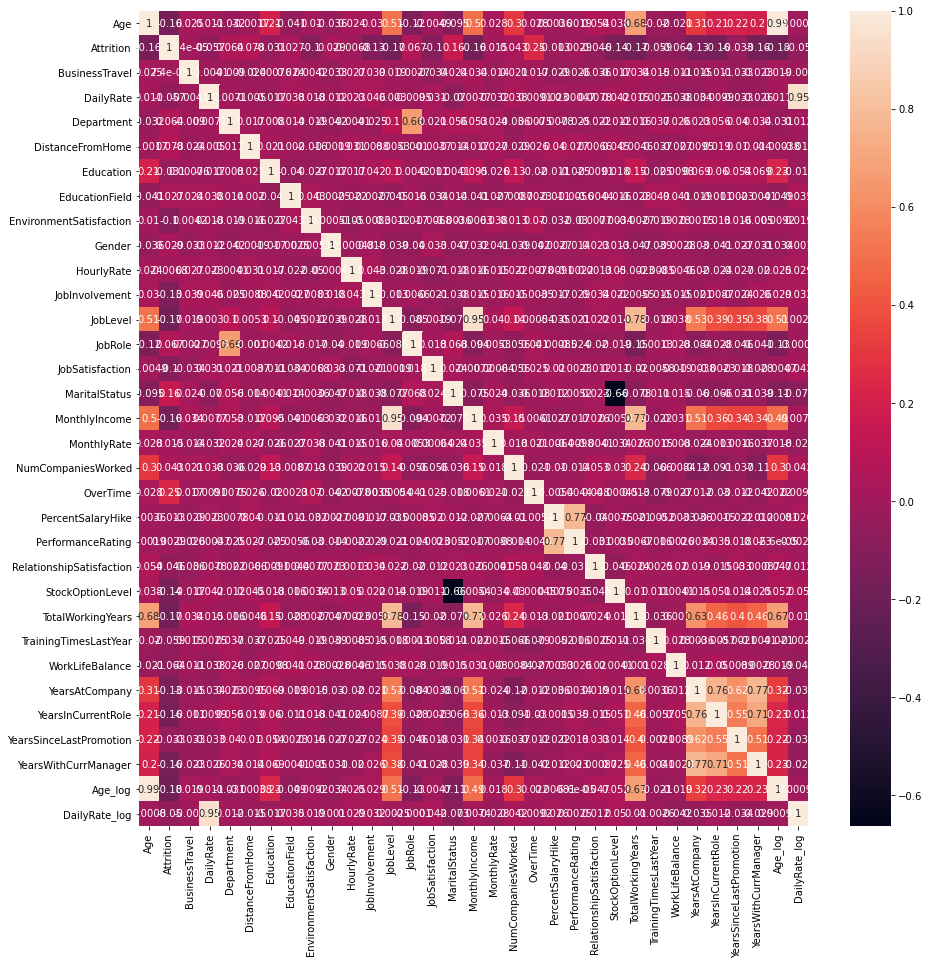

In [53]:
import seaborn as sns
corr_hmap=data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Age                            AxesSubplot(0.125,0.772143;0.110714x0.107857)
Attrition                   AxesSubplot(0.257857,0.772143;0.110714x0.107857)
BusinessTravel              AxesSubplot(0.390714,0.772143;0.110714x0.107857)
DailyRate                   AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Department                  AxesSubplot(0.656429,0.772143;0.110714x0.107857)
DistanceFromHome            AxesSubplot(0.789286,0.772143;0.110714x0.107857)
Education                      AxesSubplot(0.125,0.642714;0.110714x0.107857)
EducationField              AxesSubplot(0.257857,0.642714;0.110714x0.107857)
EnvironmentSatisfaction     AxesSubplot(0.390714,0.642714;0.110714x0.107857)
Gender                      AxesSubplot(0.523571,0.642714;0.110714x0.107857)
HourlyRate                  AxesSubplot(0.656429,0.642714;0.110714x0.107857)
JobInvolvement              AxesSubplot(0.789286,0.642714;0.110714x0.107857)
JobLevel                       AxesSubplot(0.125,0.513286;0.110714x0.107857)

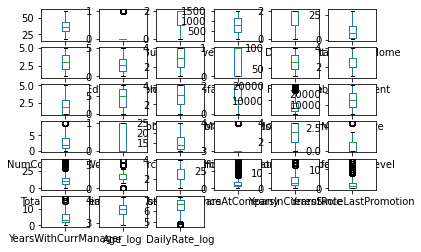

In [54]:
# checking outliers
data.plot.box(subplots=True,layout=(6,6))

In [60]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(data))
print(data.shape)
data=data.loc[(z<3).all(axis=1)]
print(data.shape)

(1470, 33)
(1387, 33)


In [64]:
#splitting the data for training and test

data_x=data.drop(columns=['Attrition'])
y=data['Attrition']

In [65]:
data_x.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
Y

In [66]:
#lets treat the skewness in the input dataset
for index in data_x.skew().index:
    if data_x.skew().loc[index]>0.5:
        data_x[index]=np.log1p(data_x[index])
    if data_x.skew().loc[index]<-0.5:
        data_x[index]=np.square(data_x[index])

In [67]:
data_x.skew()

Age                         0.472280
BusinessTravel             -1.007964
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome           -0.031570
Education                  -0.289024
EducationField             -0.055326
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement              0.329667
JobLevel                    0.497167
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.318873
MonthlyRate                 0.030596
NumCompaniesWorked          0.101288
OverTime                    0.954751
PercentSalaryHike           0.496106
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.275912
TotalWorkingYears           0.241110
TrainingTimesLastYear       0.513454
WorkLifeBalance             0.299233
YearsAtCompany             -0.379527
Y

In [68]:
# applying pca to minimise no. of columns to 10
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x=pca.fit_transform(data_x)

In [69]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(data_x)


In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_score=0

for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    if score>max_score:
        max_score=score
        final_r_state=r_state
print("Maximimum Accuracy Score is",max_score,'at',final_r_state)


Maximimum Accuracy Score is 0.8986928104575164 at 79


In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=79)

model=[LogisticRegression(),GaussianNB(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 

Accuracy Score of LogisticRegression() is:
0.8986928104575164
[[254   4]
 [ 27  21]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       258
           1       0.84      0.44      0.58        48

    accuracy                           0.90       306
   macro avg       0.87      0.71      0.76       306
weighted avg       0.89      0.90      0.88       306



Accuracy Score of GaussianNB() is:
0.7941176470588235
[[218  40]
 [ 23  25]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       258
           1       0.38      0.52      0.44        48

    accuracy                           0.79       306
   macro avg       0.64      0.68      0.66       306
weighted avg       0.82      0.79      0.81       306



Accuracy Score of SVC() is:
0.8627450980392157
[[255   3]
 [ 39   9]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       258
 

# some ensemble technique to boost the accuracy score

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
rf=RandomForestClassifier(n_estimators=100,random_state=91)   
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


0.8562091503267973
[[255   3]
 [ 41   7]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       258
           1       0.70      0.15      0.24        48

    accuracy                           0.86       306
   macro avg       0.78      0.57      0.58       306
weighted avg       0.84      0.86      0.81       306



In [75]:
ad=AdaBoostClassifier(n_estimators=100,random_state=91)   
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))


0.8790849673202614
[[245  13]
 [ 24  24]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       258
           1       0.65      0.50      0.56        48

    accuracy                           0.88       306
   macro avg       0.78      0.72      0.75       306
weighted avg       0.87      0.88      0.87       306



In [76]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))


0.8660130718954249
[[251   7]
 [ 34  14]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       258
           1       0.67      0.29      0.41        48

    accuracy                           0.87       306
   macro avg       0.77      0.63      0.67       306
weighted avg       0.85      0.87      0.84       306



In [77]:
# so we get the best result by using model logistic regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))
print('classification report:',classification_report(y_test,pred))

Accuracy score: 0.8986928104575164
confusion matrix: [[254   4]
 [ 27  21]]
classification report:               precision    recall  f1-score   support

           0       0.90      0.98      0.94       258
           1       0.84      0.44      0.58        48

    accuracy                           0.90       306
   macro avg       0.87      0.71      0.76       306
weighted avg       0.89      0.90      0.88       306



In [78]:
# cross validation

from sklearn.model_selection import cross_val_score

scores=cross_val_score(lg,x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[0.87769784 0.86330935 0.86281588 0.8700361  0.87725632]
0.8702230994987403 0.0064504206002253765


In [79]:
# saving the model

import joblib
joblib.dump(lg,'hrAnalytics.obj') 

['hrAnalytics.obj']